

# **Müşterinin Özelliklerine Göre Segmentinin Belirlenmesi**

Bu çalışmada bir otomobil şirketi için müşterinin özelliklerine göre  **yapay sinir ağları** ve **makine öğrenmesi** algoritmalarıyla segmentinin belirlenmesi gerçekleştirilmiştir. Amaç ise sonuçlara göre doğru müşteriye ulaşmak ve satışları daha doğru daha kazançlı şekilde yapabilmeyi sağlamaktır.

Veri seti Kaggle dan edinilmiştir. **Train.csv** ve **Test.csv** şeklinde iki dosya halindedir. Aşağıdaki kod çalıştırılarak, iki dosyanın colab ortamına yüklenmesi sağlanır.




> Veriyi kullanım açısından sayısal tabloları işleyen **Pandas** ve çok boyutlu dizilerde işlem yapmamızı sağlayan, matematiksel fonksiyonları barındıran  **NumPy**  kütüphaneleri yüklenmiştir.



In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from google.colab import files

uploaded = files.upload()


Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


## **Veri Seti**

### **Veri Seti Değişkenlerinin Tablo Halinde Gösterimi**

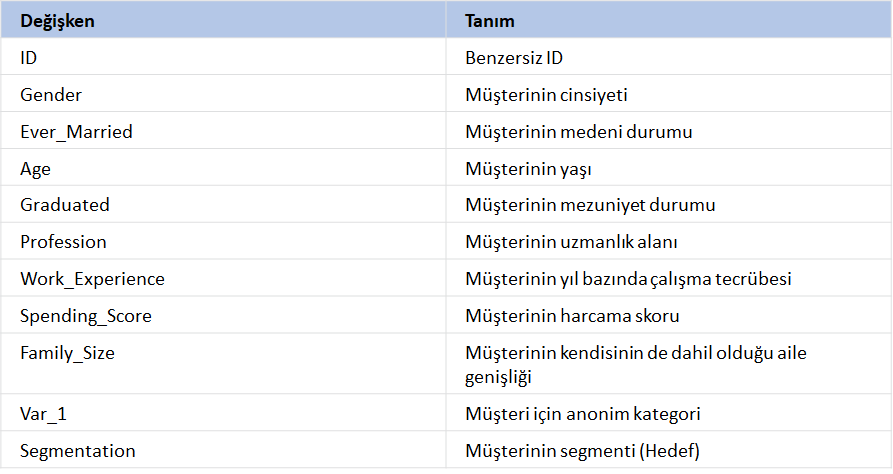

### **Veri Setinde Ön İşleme**




**Train veri seti** 8068 ve **Test veri seti** 2627 satırdan oluşmaktadır. Bu iki veri seti aşağıdaki kodda birleştirilmiştir ve  toplam  10695 satır veri içermektedir. Veri setinde 11 adet kolon bulunmaktadır.

In [ ]:
trainDS = pd.read_csv('Train.csv')
trainDS

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
testDS = pd.read_csv('Test.csv')
testDS

dfData = pd.concat([trainDS,testDS])
dfData

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [ ]:
dfData.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
dfData.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

**Var_1** isimli özellik anonim bir özelliktir, dolayısıyla ne olduğu bilinmemektedir. **ID** özelliği ise benzersiz ID yi göstermektedir bu nedenle belirleyiciliği yoktur. Bu sebepler nedeniyle bu iki kolon veri setinden çıkarılmıştır

In [ ]:
del dfData['Var_1']
del dfData['ID']

Veri setini daha temiz hale getirmek ve etkili sonuç alabilmek için null veriler veri setinden çıkarılmıştır.

In [ ]:
dfData = dfData.dropna()
dfData

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.0,Low,2.0,D
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,B
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,A
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,C


Her bir kolon için null veri sayısı aşağıdaki kod yazılarak görülmüştür. Null verileri veri setinden çıkarmamız sonucunda hiçbir kolonda null verinin kalmadığı görülmektedir.

In [ ]:
dfData.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

Aşağıdaki kodda verilerin grafiksel olarak görselleştirmesi yapılmıştır. Bu görselleştirme için **Seaborn** isimli taban olarak **matplotlib** görselleştirme kütüphanesini kullanan yüksek seviye veri görselleştirme kütüphanesi kullanılmıştır

Grafiklerden **ilkine** bakıldığında, erkek sayısının kadın sayısına oranla veri setinde daha yoğun bulunduğu görülmektedir. **İkinci grafiğe** bakıldığında ise medeni hali evli olanların sayıca bekarlara göre fazla olduğu görülmektedir. **Üçüncü grafiğe** bakıldığında ise üniversiteden mezun olan kişi sayısı daha fazladır. Buna göre veri setinin eğitimli kişi sayısı olarak daha yoğun olduğu söylenebilir. **Dördüncü grafiğe** bakıldığında ise meslek alanı bakımından veri setinde sanatçılar diğer meslek gruplarına oranla oldukça yoğundur. Arkasından ise sağlık çalışanları gelmektedir. **Beşinci grafiğe** gelindiğinde ise çalışma tecrübesinin yıl bazında gösterimi görülmektedir. Buna göre henüz bir sene çalışma tecrübesi olmayanlar ve bir sene çalışma tecrübesi olanlar veri setinde çalışma tecrübesi fazla olanlara göre çok daha yoğundur. **Altıncı grafiğe** bakıldığında ise harcama skoru grafiği görülmektedir. Buna göre düşük harcama skoruna sahip olanlar veri setinde orta ve yüksek harcama skor gruplarına göre daha yoğun olarak bulunmaktadır. **Yedinci grafikte** aile genişliği dağılımına bakıldığında ise iki kişilik ailelerin veri setinde yoğun olduğu görülmektedir. Buna göre çocuksuz çiftlerin veri setinde daha yoğun olduğu söylenebilmektedir. Arkasından ise tek ve üç kişilik aileler gelmektedir. Tek kişilik aile gösterimi kişinin kendisini ifade etmektedir. **Son grafiğe** geldiğimizde ise hedef değişken olan segment değişkeninin dağılım grafiği görülmektedir. Bu gösterime göre D segmentinin veri setinde A, B ve C segmentlerine oranla daha yoğun olduğu görülmektedir. Segmentler arasında sayıca çok büyük bir fark yoktur, bütün segmentler sayıca 2000-2500 aralığındadır. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


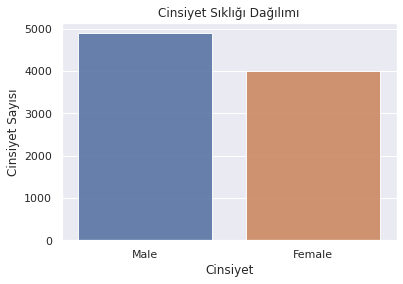

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


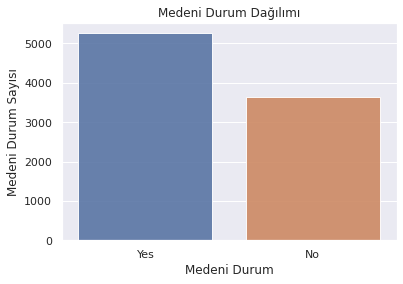

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


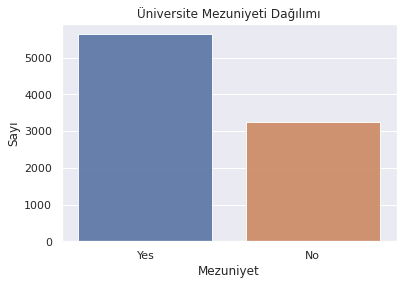

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


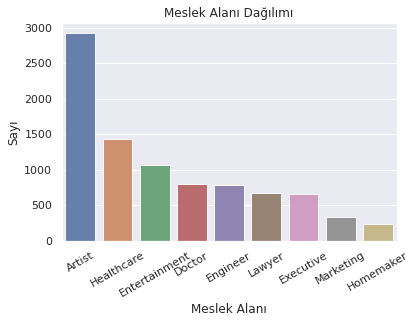

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


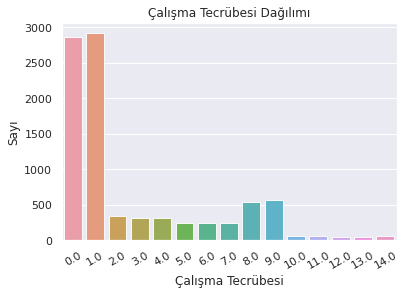

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


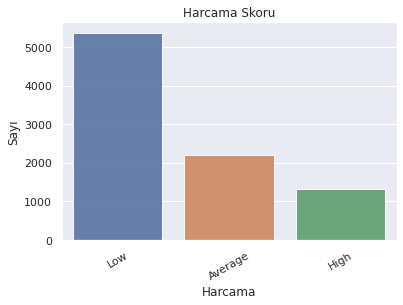

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


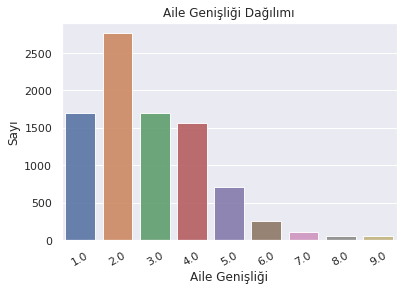

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


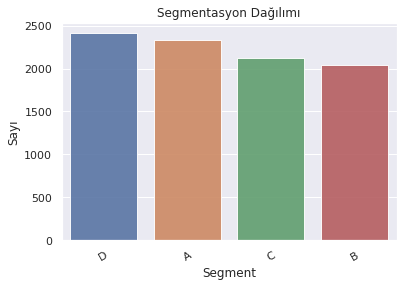

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_count = dfData['Gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Cinsiyet Sıklığı Dağılımı')
plt.ylabel('Cinsiyet Sayısı', fontsize=12)
plt.xlabel('Cinsiyet', fontsize=12)
plt.show()

evermarried_count = dfData['Ever_Married'].value_counts()
sns.set(style="darkgrid")
sns.barplot(evermarried_count.index, evermarried_count.values, alpha=0.9)
plt.title('Medeni Durum Dağılımı')
plt.ylabel('Medeni Durum Sayısı', fontsize=12)
plt.xlabel('Medeni Durum', fontsize=12)
plt.show()

graduated_count = dfData['Graduated'].value_counts()
sns.set(style="darkgrid")
sns.barplot(graduated_count.index, graduated_count.values, alpha=0.9)
plt.title('Üniversite Mezuniyeti Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Mezuniyet', fontsize=12)
plt.show()

profession_count = dfData['Profession'].value_counts()
sns.set(style="darkgrid")
sns.barplot(profession_count.index, profession_count.values, alpha=0.9)
plt.title('Meslek Alanı Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Meslek Alanı', fontsize=12)
plt.xticks(rotation=30)
plt.show()

workexperience_count = dfData['Work_Experience'].value_counts()
sns.set(style="darkgrid")
sns.barplot(workexperience_count.index, workexperience_count.values, alpha=0.9)
plt.title('Çalışma Tecrübesi Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Çalışma Tecrübesi', fontsize=12)
plt.xticks(rotation=30)
plt.show()

spendingscore_count = dfData['Spending_Score'].value_counts()
sns.set(style="darkgrid")
sns.barplot(spendingscore_count.index, spendingscore_count.values, alpha=0.9)
plt.title('Harcama Skoru')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Harcama', fontsize=12)
plt.xticks(rotation=30)
plt.show()

familysize_count = dfData['Family_Size'].value_counts()
sns.set(style="darkgrid")
sns.barplot(familysize_count.index, familysize_count.values, alpha=0.9)
plt.title('Aile Genişliği Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Aile Genişliği', fontsize=12)
plt.xticks(rotation=30)
plt.show()
       
segmentation_count = dfData['Segmentation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(segmentation_count.index, segmentation_count.values, alpha=0.9)
plt.title('Segmentasyon Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Aşağıdaki kodlarda verilerin tiplerinde dönüştürme yapılmıştır.
 
> **Cinsiyet** için Erkekler 0 Kadınlar ise 1 ile ifade edilmiştir.


In [ ]:
dfData['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
replace_GenderMap= {'Gender': {'Male': 0, 'Female': 1}}
replace_GenderMap

{'Gender': {'Female': 1, 'Male': 0}}

In [ ]:
dfData.replace(replace_GenderMap, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




> **Medeni Durum** için Bekarlar 0 Evliler ise 1 ile ifade edilmiştir.



In [ ]:
dfData['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
replace_EverMarriedMap= {'Ever_Married': {'No': 0, 'Yes': 1}}
replace_EverMarriedMap

{'Ever_Married': {'No': 0, 'Yes': 1}}

In [ ]:
dfData.replace(replace_EverMarriedMap, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




> **Mezuniyet** durumuna göre üniversiteden Mezun Olmayanlar 0 Mezun olanlar ise 1 ile ifade edilmiştir.



In [ ]:
dfData['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
replace_GraduatedMap= {'Graduated': {'No': 0, 'Yes': 1}}
replace_GraduatedMap

{'Graduated': {'No': 0, 'Yes': 1}}

In [ ]:
dfData.replace(replace_GraduatedMap, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




> **Uzmanlık Alanlarına** göre Sağlık Çalışanları 0, Mühendisler 1, Hukukçular 2, Sanatçılar 3, Doktorlar 4, Ev Kadınları 5, Eğlence Sektörü Çalışanları 6, Pazarlama Çalışanları 7, Yöneticiler ise 8 ile ifade edilmiştir.



In [ ]:
dfData['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
replace_ProfessionMap= {'Profession': {'Healthcare': 0, 'Engineer': 1, 'Lawyer' : 2, 'Artist' : 3,  'Doctor' : 4, 'Homemaker' : 5, 'Entertainment' : 6, 'Marketing' : 7, 'Executive'  : 8   }}
replace_ProfessionMap

{'Profession': {'Artist': 3,
  'Doctor': 4,
  'Engineer': 1,
  'Entertainment': 6,
  'Executive': 8,
  'Healthcare': 0,
  'Homemaker': 5,
  'Lawyer': 2,
  'Marketing': 7}}

In [ ]:
dfData.replace(replace_ProfessionMap, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




> **Harcama Skorlarına** göre Düşük Harcama Skoru 0, Orta Harcama Skoru 1 ve Yüksek Harcama Skoru 2 ile ifade edilmiştir.



In [ ]:
dfData['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
replace_SpendingScoreMap= {'Spending_Score': {'Low': 0, 'High': 1, 'Average' : 2  }}
replace_SpendingScoreMap

{'Spending_Score': {'Average': 2, 'High': 1, 'Low': 0}}

In [ ]:
dfData.replace(replace_SpendingScoreMap, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




> **Segmentler** ise A segmenti 0, B segmenti 1, C segmenti 2 ve D segmenti 3 olacak şekilde ifade edilmiş ve değiştirilmiştir.



In [ ]:
dfData['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
replace_SegmentationMap= {'Segmentation': {'A': 0, 'B': 1, 'C' : 2, 'D' : 3  }}
replace_SegmentationMap

{'Segmentation': {'A': 0, 'B': 1, 'C': 2, 'D': 3}}

In [ ]:
dfData.replace(replace_SegmentationMap, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Yapılan değişimler sonucunda veri seti aşağıdaki haline dönüşmüştür.

In [ ]:
dfData

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,22,0,0,1.0,0,4.0,3
2,1,1,67,1,1,1.0,0,1.0,1
3,0,1,67,1,2,0.0,1,2.0,1
5,0,1,56,0,3,0.0,2,2.0,2
6,0,0,32,1,0,1.0,0,3.0,2
...,...,...,...,...,...,...,...,...,...
2621,1,0,35,1,6,1.0,0,2.0,3
2622,0,0,29,0,0,9.0,0,4.0,1
2623,1,0,35,1,4,1.0,0,1.0,0
2625,0,1,47,1,8,1.0,1,5.0,2


Yukarıdaki dönüştürülmüş veri setinde görüldüğü gibi **Çalışma Tecrübesi** ve **Aile Genişliği** özelliklerinin tipi int değildir. Bu nedenle veri tipleri int e dönüştürülmüştür. Bu dönüşüm ile birlikte tüm verilerin tipi int64 olmuştur.

In [ ]:
dfData['Work_Experience'] = dfData['Work_Experience'].astype(np.int64)
dfData['Family_Size'] = dfData['Family_Size'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8896 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           8896 non-null   int64
 1   Ever_Married     8896 non-null   int64
 2   Age              8896 non-null   int64
 3   Graduated        8896 non-null   int64
 4   Profession       8896 non-null   int64
 5   Work_Experience  8896 non-null   int64
 6   Spending_Score   8896 non-null   int64
 7   Family_Size      8896 non-null   int64
 8   Segmentation     8896 non-null   int64
dtypes: int64(9)
memory usage: 695.0 KB


### **Korelasyonlar ve Korelasyonlardan Kurtulma**

**Korelasyon** hesaplamayla iki değişken arasında bir ilişki olup olmadığı anlaşılmaktadır. Korelasyon sonuçları -1 ile 1 arasında olmaktadır. Korelasyon değeri 1 e veya -1 e yakınsa iki değişken arasında güçlü bir ilişki  olduğu anlamına gelir. Aralarında güçlü ilişki bulunan değişkenlerden birinin veri setinden çıkarılması sonuçların daha doğru olması için önemlidir.

Aşağıdaki kod ile değişkenler arasında korelasyon ölçümü yapılmakta ve grafiksel olarak gösterilmektedir. Grafikten anlaşılacağı üzere yaş ve medeni durum halinde güçlü bir korelasyon vardır.

In [ ]:
def check_corr(dfData, pct = 0.05):
    corr = data.corr()
    corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
    corr_triu.stack()
    return  corr_triu[corr_triu>pct]
    print(corr)

In [ ]:
def corr_figure(corr):    
    mask = np.zeros_like(corr, dtype=np.float)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap="True")
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

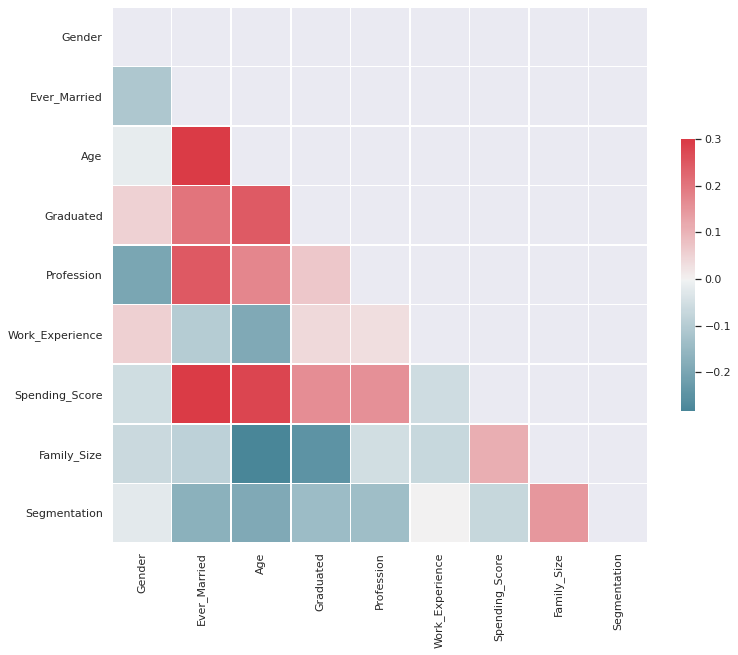

In [ ]:
corr_figure(dfData.corr())

Aşağıdaki kod çalıştırıldığında, **Yaş** kolonunun eşik değeri olarak belirlenen 5.0 değerini geçtiği görülmektedir. Bu nedenle bu değişken veri setinden çıkarılmıştır.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        print("vif",vif)
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print(vif)

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dfData_no_collinearity = calculate_vif_(dfData)

vif [1.8226472496191635, 5.80874754870185, 8.428164594370113, 2.9199892938620176, 3.08089717072057, 1.5577959065836673, 2.7545411537413584, 3.456186531615831, 2.5746439724718417]
dropping 'Age' at index: 2
vif [1.6978795857533584, 4.046957570108434, 2.5570392362517134, 2.837966649078196, 1.5563726527505541, 2.6763396214587045, 3.311173409071413, 2.4548234239236386]
[1.6978795857533584, 4.046957570108434, 2.5570392362517134, 2.837966649078196, 1.5563726527505541, 2.6763396214587045, 3.311173409071413, 2.4548234239236386]
Remaining variables:
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')


In [ ]:
dfData_no_collinearity.shape

(8896, 8)

Aşağıdaki grafik(heat map) ise korelasyondan kurtulan veri setinin gösterimidir.

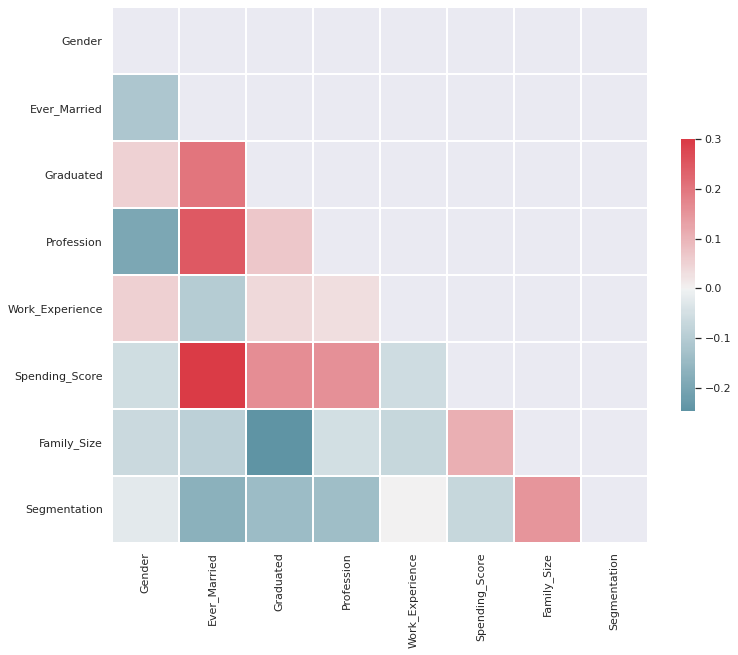

In [ ]:
corr_figure(dfData_no_collinearity.corr())

Korelasyondan kurutulan veri setinin yeni hali aşağıdaki kod ile gösterilmiştir.

In [ ]:
dfData = dfData_no_collinearity
dfData

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,0,0,1,0,4,3
2,1,1,1,1,1,0,1,1
3,0,1,1,2,0,1,2,1
5,0,1,0,3,0,2,2,2
6,0,0,1,0,1,0,3,2
...,...,...,...,...,...,...,...,...
2621,1,0,1,6,1,0,2,3
2622,0,0,0,0,9,0,4,1
2623,1,0,1,4,1,0,1,0
2625,0,1,1,8,1,1,5,2


### **Verinin Train ve Test Olarak Ayrılması**

Veri seti bu kısımda **eğitim ve test** olarak ikiye ayrılmaktadır. Eğitim veri seti ile temel modelleme denemeleri yapılarak en doğru makine öğrenmesi algoritması seçilmeye çalışılır. Test veri seti üzerinde ise daha önce eğitim veri seti üzerinde öğrenme yapılmış makine öğrenmesi modeli uygulanır. Bu şekilde modellemenin doğruluğu ölçümlenir.

Bu veri setinde test oranı %20 ve eğitim verisi oranı %80 olarak belirlenmiştir.

Doğruluk değerleri, her çalışmada değişebilmektedir fakat random_state parametresine değer ataması yapıldığında bu durum önlenmektedir.

In [ ]:
random_state = 1
import numpy as np

In [ ]:
input_features = dfData.iloc[:, :-1]
print(input_features.to_numpy())

[[0 0 0 ... 1 0 4]
 [1 1 1 ... 1 0 1]
 [0 1 1 ... 0 1 2]
 ...
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 1 1 5]
 [1 0 1 ... 9 0 3]]


In [ ]:
target_output = dfData.iloc[:, -1].to_numpy()
print(target_output)

[3 1 1 ... 0 2 0]


### **Yapay Sinir Ağlarının Uygulanması**

**Yapay Sinir Ağı Uygulamasında Temel Süreç Akışı**

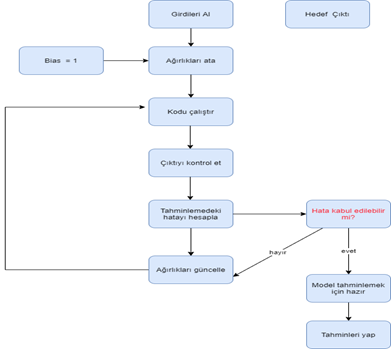

Aşağıdaki kodda, oluşturulan veri setine yapay sinir ağları uygulanmıştır. Bunun için **Keras** isimli açık kaynak sinir ağı kütüphanesinden faydalanılmıştır. İlk aşamada model oluşturulmuştur, sonrasında ise modele giriş değeri ve gizli katman eklenmiştir. Gizli katman için varsayılan aktivasyon fonksiyonu **ReLU** fonksiyonudur. Çıktı katmanı için ise aktivasyon fonksiyonu tahmin probleminin türüne göre değişmektedir. Veri setinde hedef değişken olan segment değişkeni multiclass bir değişkendir. Yani A, B, C ve D olarak 4 adettir. Bu nedenle aktivasyon fonksiyonu olarak **softmax** kullanılmıştır.

Eğitimde epoch sayısı 100 olarak belirlenmiştir. Model eğitimi sırasında verilerin tamamı aynı anda eğitime katılmaz. Belli kısımlar şeklinde eğitilirler. Öncelikle birinci kısım  eğitilir, modelin başarımı test edilir, başarıma göre **backpropagation** algoritması ile ağırlıklar güncellenir. Daha sonra yeni kısım ile model tekrar eğitilip ağırlıklar tekrar güncellenir. Bu işlem her eğitim adımında tekrarlanır. Böylelikle model için en uygun ağırlık değerleri hesaplanmaya çalışılır. Bu eğitim adımlarına ise **epoch** denilmektedir ve eğitim turu anlamına gelmektedir.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(input_features,target_output,test_size=0.2,stratify=target_output,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# Model Oluşturma
model = Sequential()

# Giriş ve ilk gizli katman
model.add(Dense(units=256, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(units=4, activation="softmax"))

# Yapay sinir ağının derlenmesi
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["CategoricalAccuracy"])

# Modelin fitlenmesi
historytrain = model.fit(X_train, y_train, epochs=100)
print("------------------------------------------------------------------------------------------------")
historytest = model.fit(X_test, y_test, epochs=100)



(7116, 7) (1780, 7) (7116,) (1780,)
Epoch 1/100
223/223 [==============================] - 1s 847us/step - loss: 1.3273 - categorical_accuracy: 0.3319
Epoch 2/100
223/223 [==============================] - 0s 767us/step - loss: 1.2498 - categorical_accuracy: 0.2762
Epoch 3/100
223/223 [==============================] - 0s 776us/step - loss: 1.2393 - categorical_accuracy: 0.2825
Epoch 4/100
223/223 [==============================] - 0s 772us/step - loss: 1.2278 - categorical_accuracy: 0.3104
Epoch 5/100
223/223 [==============================] - 0s 895us/step - loss: 1.2330 - categorical_accuracy: 0.3104
Epoch 6/100
223/223 [==============================] - 0s 856us/step - loss: 1.2273 - categorical_accuracy: 0.3332
Epoch 7/100
223/223 [==============================] - 0s 767us/step - loss: 1.2219 - categorical_accuracy: 0.2900
Epoch 8/100
223/223 [==============================] - 0s 787us/step - loss: 1.2200 - categorical_accuracy: 0.3164
Epoch 9/100
223/223 [=======================

Aşağıdaki kodda, orijinal verinin dağılımı gösterilmiştir.

In [ ]:
print(f'Original data balance: {np.bincount(y_train)}')

Original data balance: [1861 1630 1697 1928]


**Dengesiz Veri Sorunu İçin SMOTE Yöntemi Uygulaması**

Dengesiz veri, eğitim için istenmeyen bir durumdur, sonuçların doğruluğunu negatif yönde etkileyebilmektedir. Bu sorunu engellemek adına SMOTE yöntemi kullanılmıştır. Aşağıdaki kodda kullanımı görülmektedir.

Veri dengeye ulaştırıldığında grafiksel olarak görselleştirilmiştir. Grafikte A, B, C ve D segmentlerindeki değerlerin eşitliği görülmektedir.

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_smt, y_smt = smt.fit_sample(X_train, y_train)

print(f'SMOTE data balance: {np.bincount(y_smt)}')

SMOTE data balance: [1928 1928 1928 1928]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Segment')

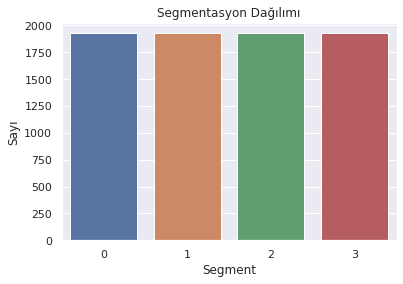

In [ ]:
import seaborn as sns
sns.countplot(y_smt)

plt.title('Segmentasyon Dağılımı')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Segment', fontsize=12)


Aşağıdaki kodda ise SMOTE yöntemi uygulanmış veri ile model eğitilmiştir.

In [ ]:
#Modelin eğitilmesi
historytrainSMT= model.fit(X_smt, y_smt, epochs=100)
print("------------------------------------------------------------------------------------------------")
historytestSMT = model.fit(X_smt, y_smt, epochs=100)

Epoch 1/100
241/241 [==============================] - 0s 1ms/step - loss: 1.2300 - categorical_accuracy: 0.2286
Epoch 2/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1959 - categorical_accuracy: 0.2540
Epoch 3/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1853 - categorical_accuracy: 0.2513
Epoch 4/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1790 - categorical_accuracy: 0.2439
Epoch 5/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1736 - categorical_accuracy: 0.2504
Epoch 6/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1718 - categorical_accuracy: 0.2486
Epoch 7/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1682 - categorical_accuracy: 0.2455
Epoch 8/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1679 - categorical_accuracy: 0.2543
Epoch 9/100
241/241 [==============================] - 0s 1ms/step - loss: 1.1648 - categorical_

### **Model Değerlendirmesi**

Aşağıdaki kodda, orijinal eğitim ve test verileri için loss(kayıp) ve accuracy(doğruluk) değerleri grafiksel olarak gösterilmiştir.

**Loss değeri** makine öğrenmesi algoritmasını optimize eder. Bir modelin, optimizasyon yinelemesinden sonra ne kadar iyi ve ne kadar kötü davrandığını ifade eder.

**Accuracy** ise modelin doğruluk değerini ifade etmektedir.

SMOTE uygulanmış veri ile orijinal verinin ANN grafikleri karşılaştırılsa, SMOTE uygulanmış test verisi ve train verisi loss da orijinale göre daha başarılı denilebilmektedir.

Değerler değerlendirildiğinde, Accuracy ise orijinal veride, train verisinde daha yüksek görünmektedir. Test verilerinin accuracy değerlerinde ise pek fark görülmemektedir.

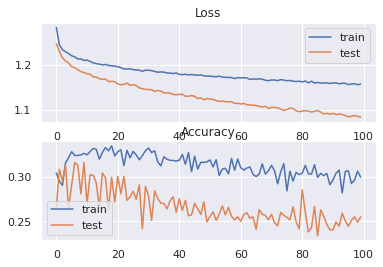

In [ ]:
from matplotlib import pyplot
# plot loss eğitim sırasında
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historytrain.history['loss'], label='train')
pyplot.plot(historytest.history['loss'], label='test')
pyplot.legend()
# plot accuracy eğitim sırasında
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(historytrain.history['categorical_accuracy'], label='train')
pyplot.plot(historytest.history['categorical_accuracy'], label='test')
pyplot.legend()
pyplot.show()

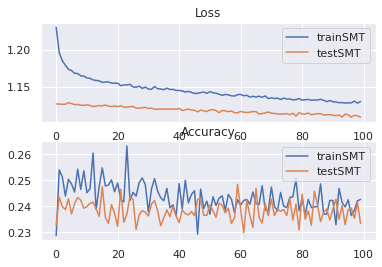

In [ ]:
from matplotlib import pyplot
# plot loss eğitim sırasında
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historytrainSMT.history['loss'], label='trainSMT')
pyplot.plot(historytestSMT.history['loss'], label='testSMT')
pyplot.legend()
# plot accuracy eğitim sırasında
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(historytrainSMT.history['categorical_accuracy'], label='trainSMT')
pyplot.plot(historytestSMT.history['categorical_accuracy'], label='testSMT')
pyplot.legend()
pyplot.show()

Gözlemleme amaçlı yazılmış koddur

In [ ]:
X_train

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
266,0,0,1,3,1,0,1
2704,0,1,1,3,1,2,3
6151,0,1,1,3,1,2,2
2600,1,1,0,1,1,1,2
115,0,1,0,8,8,2,4
...,...,...,...,...,...,...,...
2138,1,0,1,1,1,0,2
1340,0,1,0,3,1,2,3
5529,1,1,0,1,0,2,2
3860,0,1,1,6,1,0,2


Gözlemleme amaçlı yazılmış koddur

In [ ]:
X_test

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
580,0,0,0,0,0,0,2
260,0,1,1,3,6,2,3
5173,0,0,1,0,3,0,4
3962,1,0,1,5,8,0,2
2930,1,0,0,5,8,0,1
...,...,...,...,...,...,...,...
7052,1,0,1,0,0,0,6
656,0,1,0,8,1,0,2
5805,1,0,1,4,0,0,2
1190,0,1,1,3,7,0,2


Gözlemleme amaçlı yazılmış koddur

In [ ]:
y_test

array([3, 2, 3, ..., 3, 2, 0])

Aşağıdaki kodda model tahmin değer raporu oluşturulmuştur. Bu rapor için **Sklearn** kütüphanesinden faydalanılmıştır.
Sklearn kütüphanesi, sınıflandırma, regresyon, kümeleme ve boyut azaltma dahil olmak üzere makine öğrenimi ve istatistiksel modelleme için birçok verimli araç içeren bir kütüphanedir.

ANN İÇİN raporlar incelendiğinde, SMOTE uygulanmış veri ile orijinal veri arasında büyük bir fark görülmemektedir. Bunun nedeni segmentlerin dağılımının orijinal veride çok dağınık olmamasına bağlanabilir.

Test verisinde ise f1 score ve accuracy sonuçlarının diğerlerine oranla biraz daha düşük olduğu görülmektedir.

**Orijinal Veri**

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#Train modeli
pred = model.predict(X_train)
x_pred = np.argmax(pred, axis=1)
clf_log = classification_report(y_train, x_pred)
print(clf_log)

              precision    recall  f1-score   support

           0       0.48      0.47      0.47      1861
           1       0.44      0.37      0.40      1630
           2       0.51      0.60      0.55      1697
           3       0.63      0.63      0.63      1928

    accuracy                           0.52      7116
   macro avg       0.52      0.52      0.51      7116
weighted avg       0.52      0.52      0.52      7116



**Test Verisi**

In [ ]:
#Test modeli
# yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
yhat_classes = (model.predict(X_test))
y_pred_bool = np.argmax(yhat_classes, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.37      0.41      0.39       466
           1       0.32      0.26      0.29       408
           2       0.45      0.53      0.49       424
           3       0.61      0.55      0.58       482

    accuracy                           0.44      1780
   macro avg       0.44      0.44      0.44      1780
weighted avg       0.44      0.44      0.44      1780



**SMOTE Yöntemi Uygulanmış Veri**

In [ ]:
#SMOTE uygulanmış data modeli
pred = model.predict(X_smt)
x_pred = np.argmax(pred, axis=1)
clf_log = classification_report(y_smt, x_pred)
print(clf_log)

              precision    recall  f1-score   support

           0       0.47      0.48      0.47      1928
           1       0.48      0.39      0.43      1928
           2       0.53      0.61      0.56      1928
           3       0.61      0.63      0.62      1928

    accuracy                           0.53      7712
   macro avg       0.52      0.53      0.52      7712
weighted avg       0.52      0.53      0.52      7712



**Gradient Boosting**

**Gradient Boosting** algoritması, iterasyonlardan elde edilen zayıf öğrenicilerden güçlü öğreniciler elde etmeye çalışan güçlü bir makine öğrenmesi algoritmasıdır.

Aşağıdaki kodda Gradient Boosting algoritması için sınıflandırma raporu görülmektedir. Orijinal veri ile SMOTE yöntemi uygulanmış veri yaklaşık olarak aynı sonucu vermiştir. Test verisinde ise orijinal veri SMOTE verisine göre daha iyi sonuç vermiştir.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

**Orijinal Veri**

In [ ]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)

pred = gbc.predict(X_train)
clf_log_gbc = classification_report(y_train, pred) 
print(clf_log_gbc)

              precision    recall  f1-score   support

           0       0.43      0.51      0.47      1861
           1       0.41      0.31      0.35      1630
           2       0.52      0.54      0.53      1697
           3       0.62      0.62      0.62      1928

    accuracy                           0.50      7116
   macro avg       0.50      0.50      0.49      7116
weighted avg       0.50      0.50      0.50      7116



**Test Verisi**

In [ ]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_test, y_test)

pred = gbc.predict(X_test)
clf_log_gbc = classification_report(y_test, pred) 
print(clf_log_gbc)

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       466
           1       0.49      0.39      0.43       408
           2       0.54      0.59      0.56       424
           3       0.64      0.67      0.66       482

    accuracy                           0.55      1780
   macro avg       0.54      0.54      0.54      1780
weighted avg       0.54      0.55      0.54      1780



**SMOTE Yöntemi Uygulanmış Veri**

In [ ]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_smt, y_smt)

pred = gbc.predict(X_smt)
clf_log_gbc = classification_report(y_smt, pred) 
print(clf_log_gbc)

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1928
           1       0.43      0.41      0.42      1928
           2       0.54      0.55      0.54      1928
           3       0.60      0.62      0.61      1928

    accuracy                           0.50      7712
   macro avg       0.50      0.50      0.50      7712
weighted avg       0.50      0.50      0.50      7712



**XGBoost Algoritması**

**XGBoost**(eXtreme Gradient Boosting), Gradient Boosting algoritmasının bazı düzenlemeler ile optimize edilmiş yüksek performanslı halidir. Bu nedenle bu çalışmada bu algoritma da denenmiştir.

Aşağıdaki kodda XGBoost algoritması için sınıflandırma raporu görülmektedir. Bu raporlamaya bakıldığında, SMOTE yöntemi uygulanmış verinin orijinale göre daha iyi sonuçlar verdiği söylenebilmektedir. Test verisinde de başarımı SMOTE yöntemi uygulanmış veri ile yaklaşık eşittir.

**Orijinal Veri**

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

random_state = 1

xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

# modelin test verisi üzerindeki performans değerlendirimi için kullanımı
xgpred = xg.predict(X_test)

clf_x = classification_report(y_test, xgpred) 
print(clf_x)


              precision    recall  f1-score   support

           0       0.38      0.48      0.42       466
           1       0.36      0.26      0.30       408
           2       0.47      0.49      0.48       424
           3       0.60      0.57      0.58       482

    accuracy                           0.45      1780
   macro avg       0.45      0.45      0.44      1780
weighted avg       0.45      0.45      0.45      1780



**Test Verisi**

In [ ]:
xg.fit(X_test, y_test)

# modelin test verisi üzerindeki performans değerlendirimi için kullanımı
xgpred = xg.predict(X_test)

clf_x = classification_report(y_test, xgpred) 
print(clf_x)


              precision    recall  f1-score   support

           0       0.47      0.50      0.49       466
           1       0.48      0.30      0.37       408
           2       0.50      0.60      0.55       424
           3       0.62      0.66      0.64       482

    accuracy                           0.52      1780
   macro avg       0.52      0.52      0.51      1780
weighted avg       0.52      0.52      0.52      1780



**SMOTE Yöntemi Uygulanmış Veri**

In [ ]:
#SMOTE uygulanmış veri modeli
xg.fit(X_smt, y_smt)

pred = xg.predict(X_smt)
clf_log_xg = classification_report(y_smt, x_pred) #get classification report for performance of the logistic model
print(clf_log_xg)

              precision    recall  f1-score   support

           0       0.47      0.48      0.47      1928
           1       0.48      0.39      0.43      1928
           2       0.53      0.61      0.56      1928
           3       0.61      0.63      0.62      1928

    accuracy                           0.53      7712
   macro avg       0.52      0.53      0.52      7712
weighted avg       0.52      0.53      0.52      7712



**Genel Değerlendirme** : Tüm bu değerlendirmelere baktığımızda ANN, Gradient Boosting, XGBoosting algoritmaları arasında en iyi sonucun Gradient Boosting algoritmasının test verisinde edinildiği söylenebilir. Tüm bu çalışmalara ek ileride bu veri setinin boyutu artırılarak ve farklı yöntemler denenerek farklı başarımlar edinilebilir ve değerlendirilebilir.